# HMM Analysis for Andreev State Spectroscopy

This notebook provides functionality for analyzing Andreev state spectroscopy data
using Hidden Markov Models (HMM) with clearing tones but no referance background clearing rates (i.e. for RUN1 data)

In [1]:
%load_ext autoreload
%autoreload 2


In [3]:
import quasiparticleFunctions as qp
from hmm_utils import (create_physics_based_transition_matrix,
                          get_means_covars)
from hmm_analysis import HMMAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
import seaborn as sns
from hmm_workflows import *

## Single Power at Fixed Flux Workflow

In [14]:
# Initialize analyzer
data_dir = "/Users/shanto/LFL/HMM_Benchmarking/data/"
analyzer = HMMAnalyzer(data_dir, num_modes=2)

new b


In [15]:
# Load data files
analyzer.load_data_files("phi_0p450")

In [16]:
# Process data for specific attenuation
atten = 26
analyzer.load_and_process_data(atten=atten)

In [7]:
%matplotlib qt


Please click on 2 mode centers

Final mode assignments:


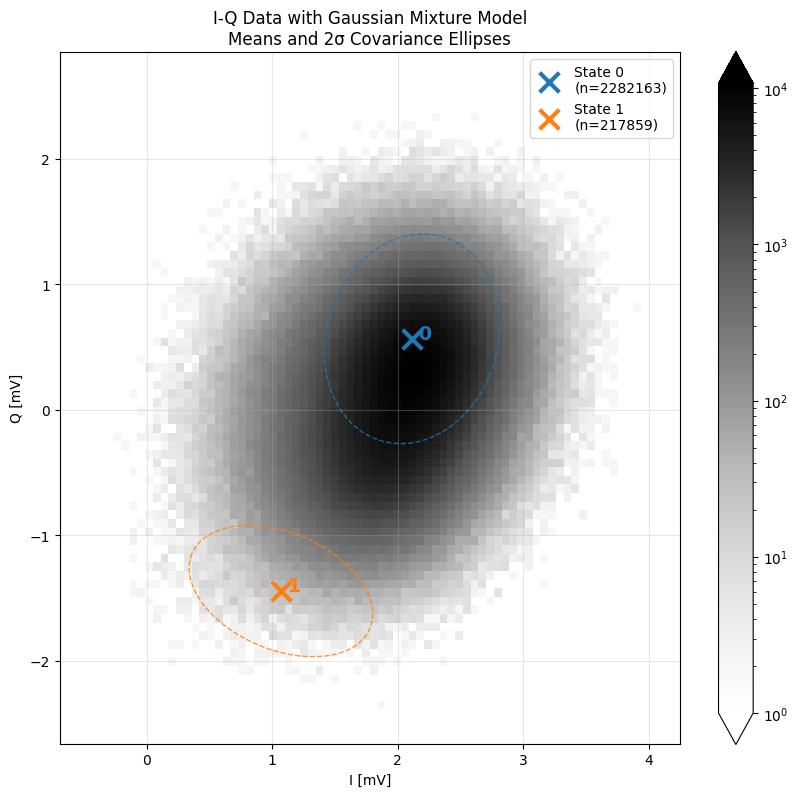

In [8]:
# Get initial parameters
result = get_means_covars(analyzer.data, analyzer.num_modes)
means_guess = result['means']
covars_guess = result['covariances']

In [12]:
means_guess = analyzer.model.means_
covars_guess = analyzer.model.covars_

In [17]:
# Initialize and fit model
analyzer.initialize_model(means_guess, covars_guess)
analyzer.fit_model()

         1    -2626203.8974             +nan
         2    -2237894.8866     +388309.0108
         3    -2213495.8996      +24398.9870
         4    -2207697.3290       +5798.5706
         5    -2206172.1199       +1525.2091
         6    -2205775.0901        +397.0298
         7    -2205671.9778        +103.1123
         8    -2205645.1098         +26.8680
         9    -2205638.0540          +7.0558
        10    -2205636.1789          +1.8751
        11    -2205635.6753          +0.5036
        12    -2205635.5380          +0.1373
        13    -2205635.4999          +0.0380
        14    -2205635.4894          +0.0106
        15    -2205635.4862          +0.0032
        16    -2205635.4853          +0.0008


In [ ]:
# Decode states and calculate probabilities
logprob, states = analyzer.decode_states()
mean_occ, probs = analyzer.calculate_occupation_probabilities(states)
print(f"Mean occupation: {mean_occ}")
print(f"Probabilities: {probs}")

# Save all results and plots
analyzer.save_analysis_results(states, atten, means_guess, covars_guess)

# Calculate SNRs
snrs = analyzer.calculate_snrs()
print("SNRs:", snrs)

Mean occupation: 0.36559198279055144
Probabilities: [0.6344080172094485, 0.36559198279055144]


## Variable Power at Fixed Flux (Bootstrapping) Workflow

new b

=== Processing attenuation: 26 dB ===

Please click on 2 mode centers

Final mode assignments:


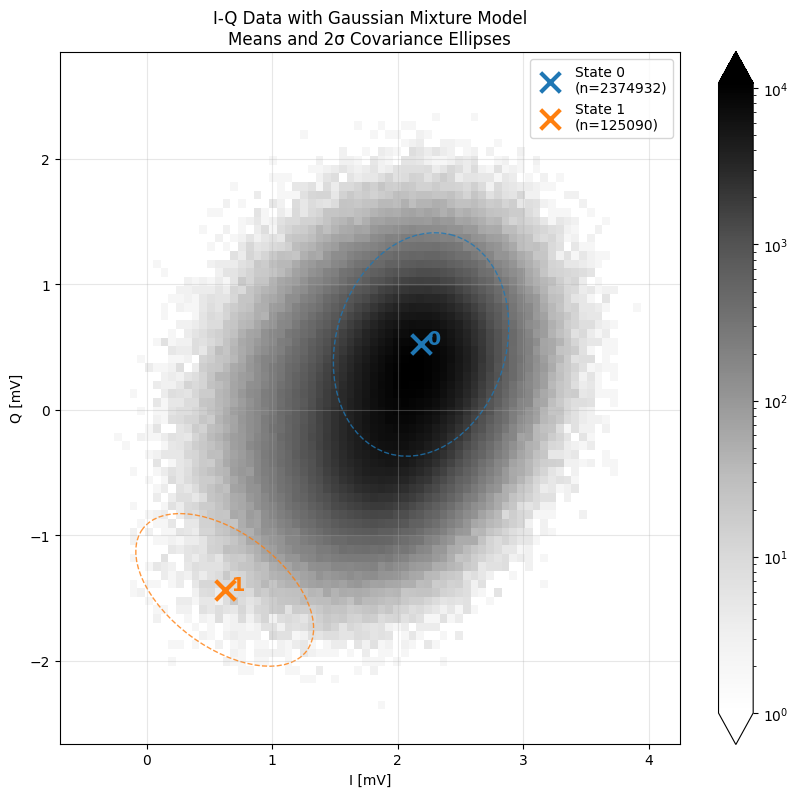

         1    -3796726.1393             +nan
         2    -2752409.2277    +1044316.9115
         3    -2749461.2781       +2947.9496
         4    -2745124.5850       +4336.6931
         5    -2736768.7699       +8355.8151
         6    -2711159.6589      +25609.1111
         7    -2624286.7989      +86872.8600
         8    -2467283.7323     +157003.0666
         9    -2332687.5104     +134596.2220
        10    -2255354.0931      +77333.4173
        11    -2221530.3939      +33823.6992
        12    -2210160.5574      +11369.8365
        13    -2206878.7207       +3281.8367
        14    -2205972.3824        +906.3384
        15    -2205726.5924        +245.7900
        16    -2205660.2349         +66.3575
        17    -2205642.2655         +17.9694
        18    -2205637.3624          +4.9031
        19    -2205636.0104          +1.3520
        20    -2205635.6342          +0.3762
        21    -2205635.5276          +0.1066
        22    -2205635.4973          +0.0303
        23

Mean occupation: 0.36559198279055144
Probabilities: [0.6344080172094485, 0.36559198279055144]
SNRs: [2.45587982]

=== Processing attenuation: 24 dB ===


         1    -4323611.3247             +nan
         2    -2208641.9984    +2114969.3263
         3    -2204810.7083       +3831.2900
         4    -2203552.1184       +1258.5899
         5    -2202493.1037       +1059.0147
         6    -2201539.7824        +953.3213
         7    -2200704.6148        +835.1675
         8    -2200001.7569        +702.8579
         9    -2199437.1342        +564.6228
        10    -2199006.0752        +431.0590
        11    -2198694.0767        +311.9985
        12    -2198479.9957        +214.0810
        13    -2198340.3620        +139.6337
        14    -2198253.3898         +86.9721
        15    -2198201.3390         +52.0508
        16    -2198171.1978         +30.1413
        17    -2198154.1966         +17.0012
        18    -2198144.8084          +9.3882
        19    -2198139.7037          +5.1048
        20    -2198136.9616          +2.7421
        21    -2198135.5015          +1.4600
        22    -2198134.7286          +0.7729
        23

Mean occupation: 0.3428577828515109
Probabilities: [0.6571422171484891, 0.3428577828515109]
SNRs: [0.25215454]
Stopping: SNR below threshold (1.5)


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

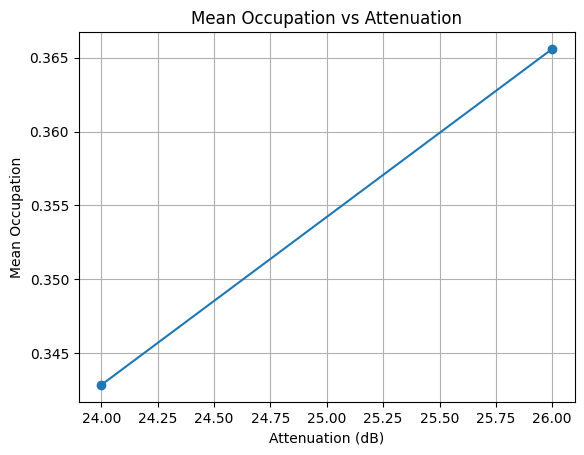

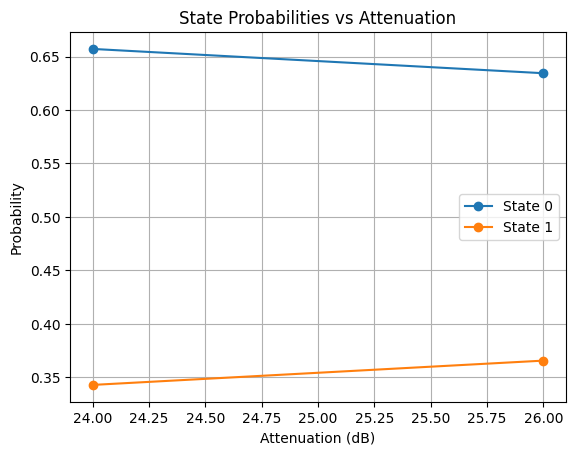

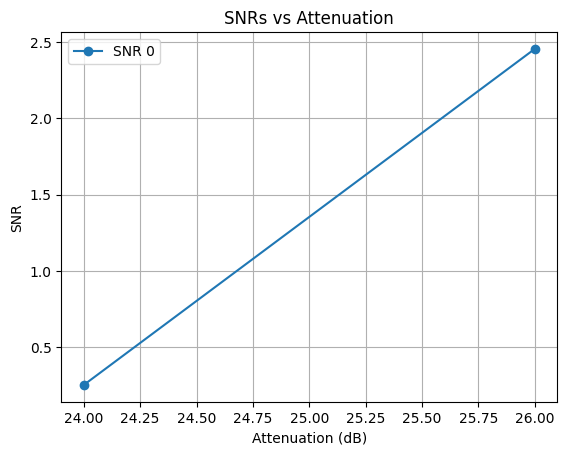

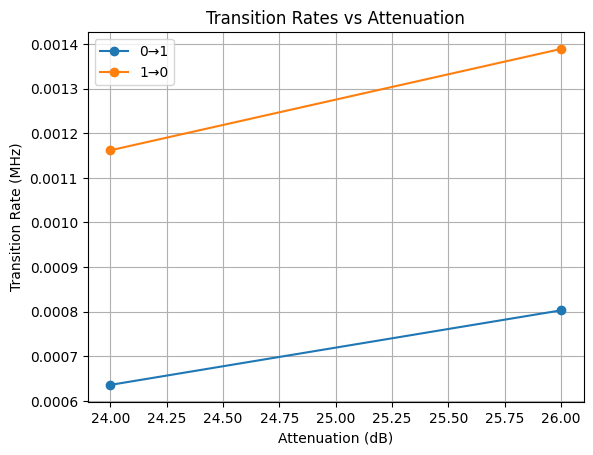

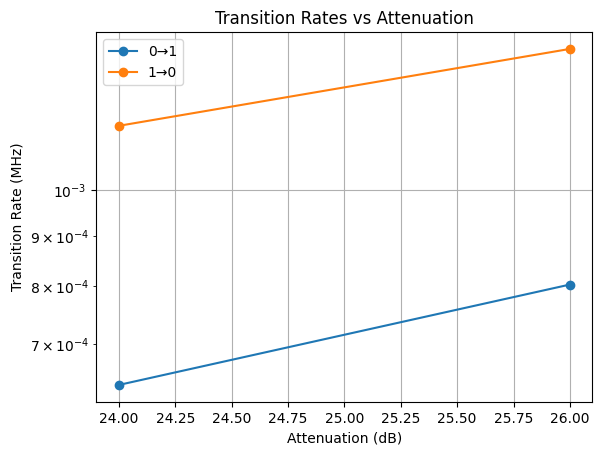

In [4]:
data_dir = "/Users/shanto/LFL/HMM_Benchmarking/data/"
analyzer = HMMAnalyzer(data_dir, num_modes=2)
bootstrapping_analysis(analyzer, "phi_0p450", non_linear_atten=26, snr_threshold=1.5)

## Variable Power and Flux (Bootstrapping) Workflow: *Human-in-the-loop*

Found phi directories: ['phi_0p450']

=== Running analysis for phi_0p450 ===

=== Processing attenuation: 26 dB ===

Please click on 2 mode centers

Final mode assignments:


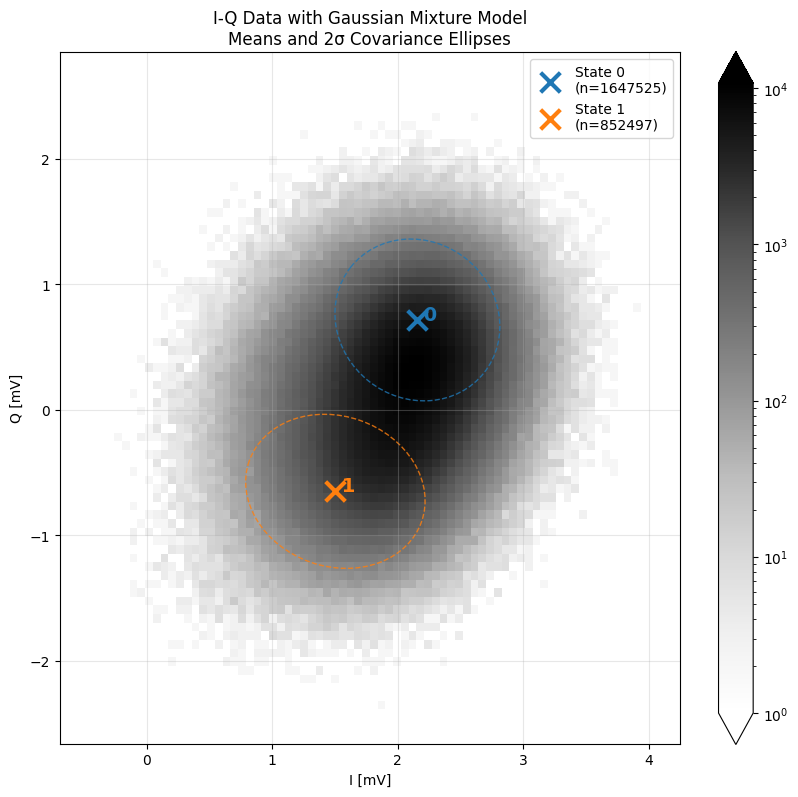

         1    -4536407.2411             +nan
         2    -2294546.7971    +2241860.4440
         3    -2250162.5382      +44384.2589
         4    -2226217.8530      +23944.6852
         5    -2213974.3875      +12243.4655
         6    -2208627.0727       +5347.3148
         7    -2206618.7472       +2008.3254
         8    -2205942.5846        +676.1626
         9    -2205728.9059        +213.6787
        10    -2205663.5467         +65.3592
        11    -2205643.8784         +19.6682
        12    -2205637.9925          +5.8859
        13    -2205636.2343          +1.7582
        14    -2205635.7097          +0.5246
        15    -2205635.5524          +0.1574
        16    -2205635.5052          +0.0471
        17    -2205635.4910          +0.0142
        18    -2205635.4869          +0.0042
        19    -2205635.4856          +0.0013
        20    -2205635.4851          +0.0004


Mean occupation: 0.36559198279055144
Probabilities: [0.6344080172094485, 0.36559198279055144]
SNRs: [2.45586958]

=== Processing attenuation: 24 dB ===


         1    -4323609.7013             +nan
         2    -2208642.0107    +2114967.6906
         3    -2204810.7542       +3831.2565
         4    -2203552.1780       +1258.5762
         5    -2202493.1335       +1059.0445
         6    -2201539.8029        +953.3306
         7    -2200704.6104        +835.1926
         8    -2200001.7686        +702.8418
         9    -2199437.1540        +564.6145
        10    -2199006.0866        +431.0674
        11    -2198694.0951        +311.9916
        12    -2198480.0106        +214.0845
        13    -2198340.3780        +139.6326
        14    -2198253.4070         +86.9709
        15    -2198201.3458         +52.0613
        16    -2198171.1991         +30.1466
        17    -2198154.1997         +16.9994
        18    -2198144.8105          +9.3892
        19    -2198139.7042          +5.1062
        20    -2198136.9619          +2.7423
        21    -2198135.5016          +1.4603
        22    -2198134.7292          +0.7724
        23

Mean occupation: 0.3428577828515109
Probabilities: [0.6571422171484891, 0.3428577828515109]
SNRs: [0.2521539]
Stopping: SNR below threshold (1.5)


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

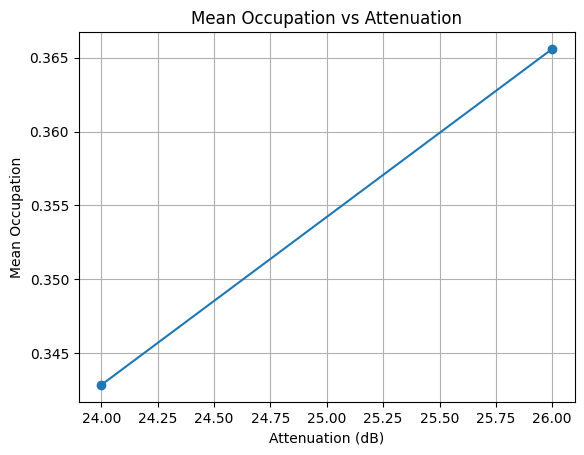

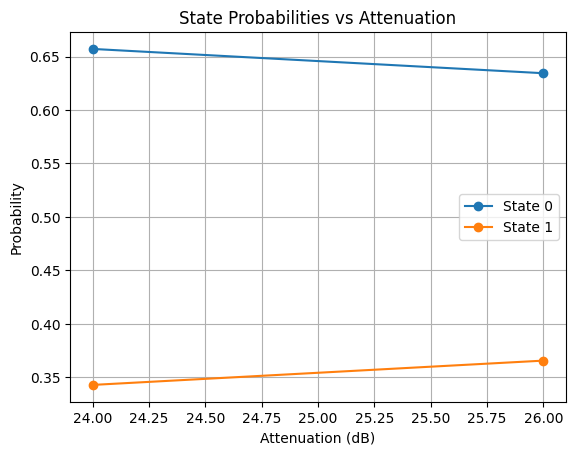

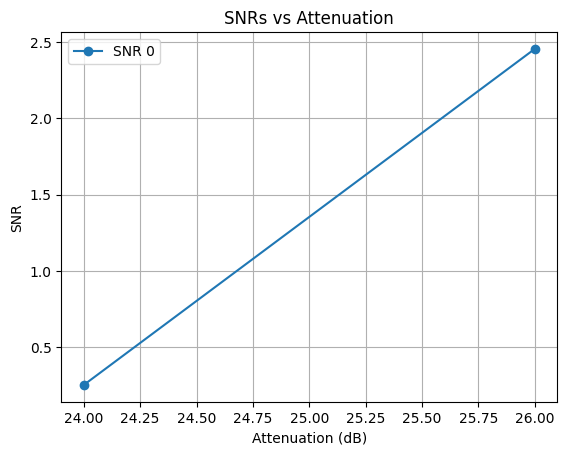

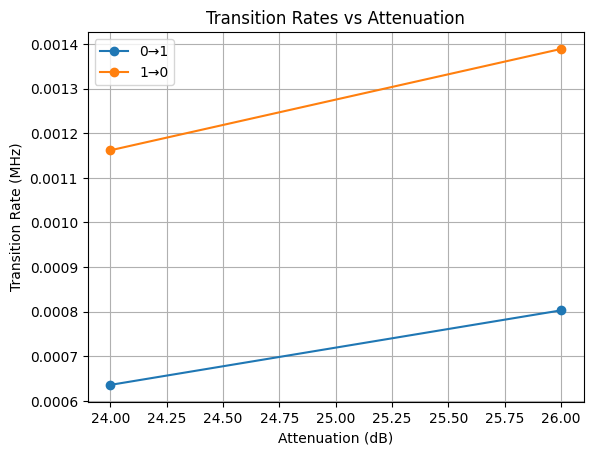

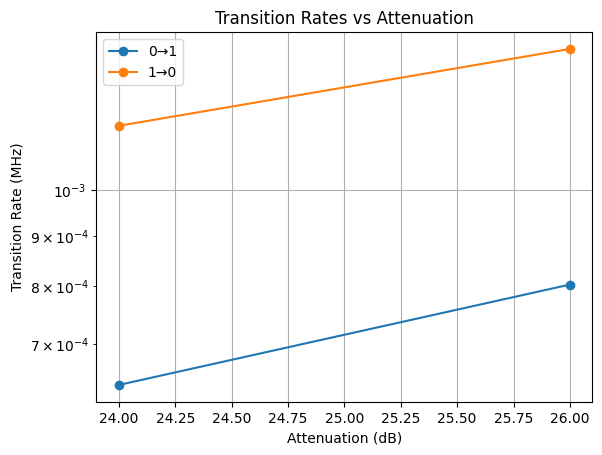

In [5]:
data_dir = "/Users/shanto/LFL/HMM_Benchmarking/data/"
analyze_flux_sweep(data_dir, num_modes=2, non_linear_atten=26, snr_threshold=1.5)

## Variable Power and Flux (Bootstrapping) Workflow: *Human-at-Instantiation*


In [6]:
data_dir = "/Users/shanto/LFL/HMM_Benchmarking/data/"
init_param_dir = "/Users/shanto/LFL/HMM_Benchmarking/initial_params/"
non_linear_attens = [22]

In [7]:
phi_dirs = sorted([d for d in os.listdir(data_dir) if d.startswith("phi_") and os.path.isdir(os.path.join(data_dir, d))])


=== Processing phi_0p450 at DA=22 ===

Please click on 3 mode centers

Final mode assignments:


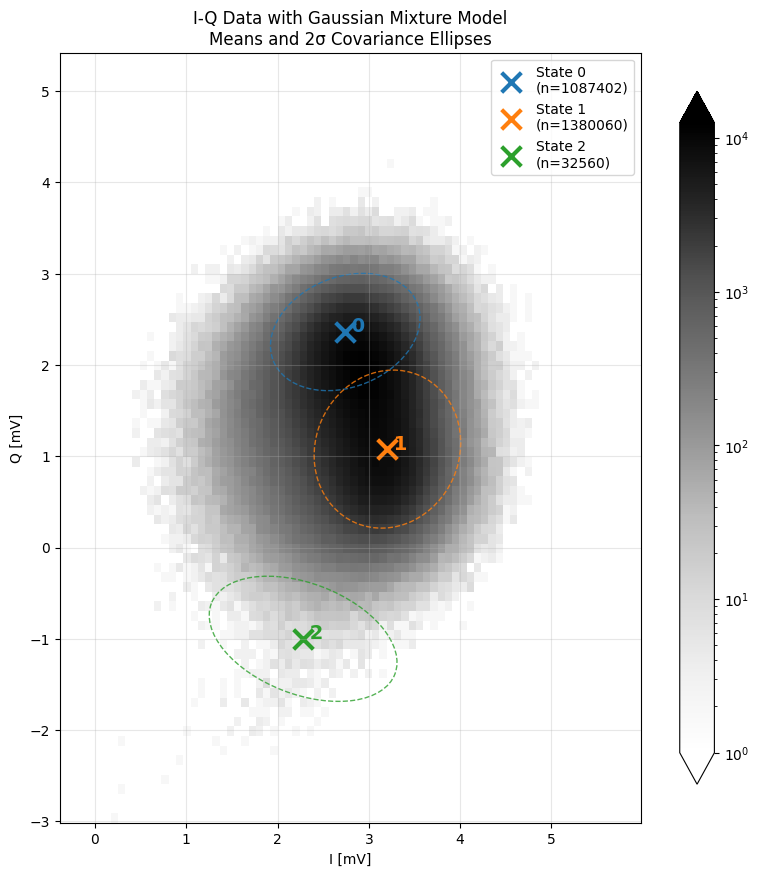

Saved: init_params_phi_0p450_DA22.npz


In [8]:
create_and_save_initial_params(data_dir, phi_dirs, non_linear_attens, num_modes=3, save_dir=init_param_dir)


=== Running analysis for phi_0p450 (DA=22) ===

=== Processing attenuation: 22 dB ===


         1    -3871735.0567             +nan
         2    -3042910.4604     +828824.5963
         3    -2977498.3926      +65412.0678
         4    -2950100.2828      +27398.1097
         5    -2937589.7659      +12510.5169
         6    -2931335.0775       +6254.6885
         7    -2927831.8060       +3503.2715
         8    -2925607.0187       +2224.7873
         9    -2924081.9477       +1525.0710
        10    -2922977.2619       +1104.6858
        11    -2922142.7445        +834.5174
        12    -2921491.2198        +651.5248
        13    -2920969.0184        +522.2014
        14    -2920541.6918        +427.3266
        15    -2920186.0832        +355.6086
        16    -2919886.0674        +300.0158
        17    -2919629.9912        +256.0761
        18    -2919409.2320        +220.7592
        19    -2919217.2394        +191.9926
        20    -2919048.9538        +168.2856
        21    -2918900.4090        +148.5448
        22    -2918768.4671        +131.9419
        23

Mean occupation: 0.4519316230017176
Probabilities: [0.5967911482378955, 0.3544860805224914, 0.04872277123961309]
SNRs: [5.51792351 4.96865581 0.61694884]


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

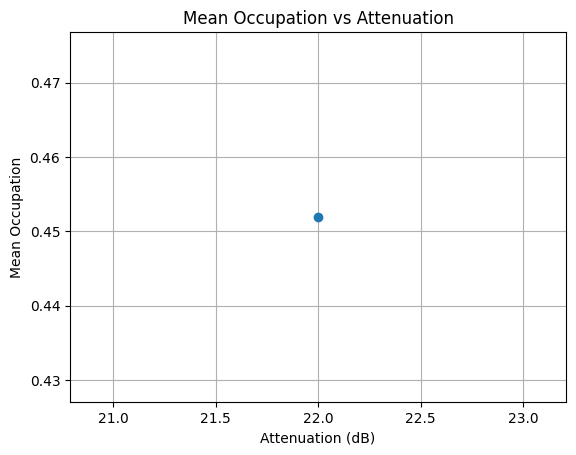

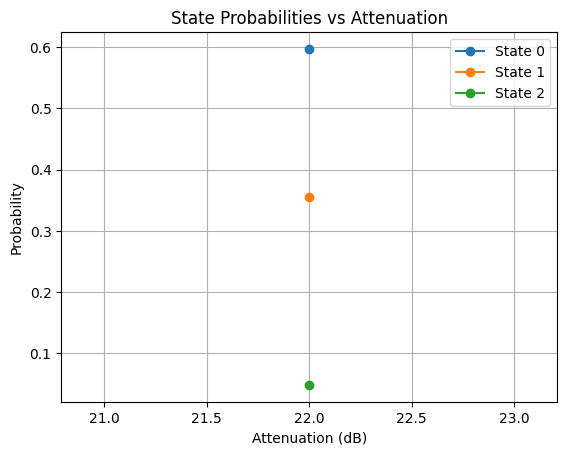

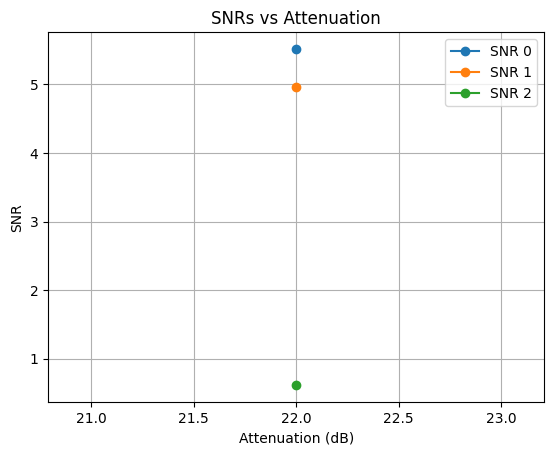

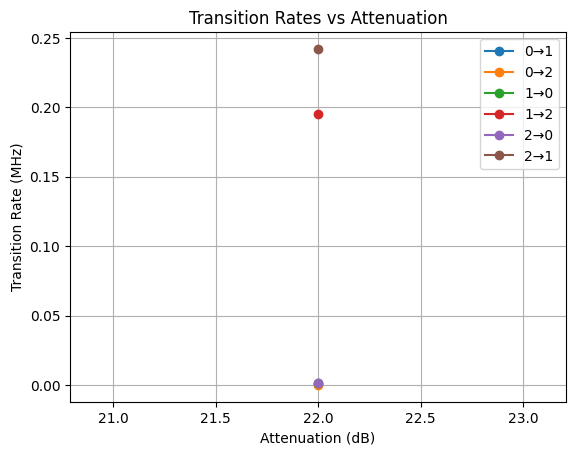

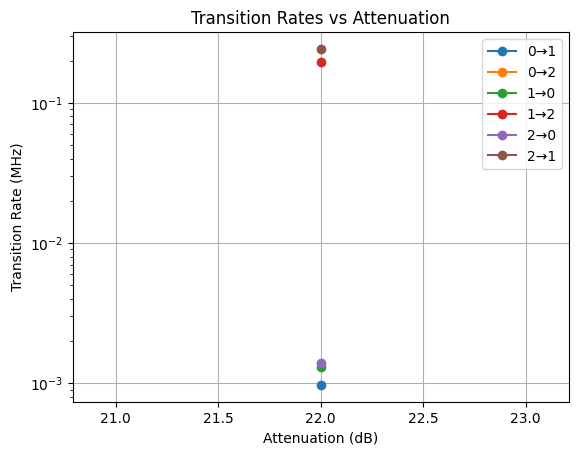


=== Processing attenuation: 20 dB ===


         1   -33897302.1718             +nan
         2    -3488385.2874   +30408916.8844
         3    -3486525.7250       +1859.5624
         4    -3483470.3482       +3055.3768
         5    -3475440.3096       +8030.0386
         6    -3462953.7269      +12486.5826
         7    -3447670.1756      +15283.5513
         8    -3400588.6130      +47081.5626
         9    -3257434.0441     +143154.5690
        10    -3103795.1884     +153638.8557
        11    -2999920.2447     +103874.9437
        12    -2951242.8623      +48677.3824
        13    -2935396.9907      +15845.8716
        14    -2931065.9313       +4331.0594
        15    -2929791.6761       +1274.2552
        16    -2929337.5111        +454.1650
        17    -2929129.7256        +207.7855
        18    -2929011.6714        +118.0542
        19    -2928935.5669         +76.1045
        20    -2928883.4734         +52.0935
        21    -2928846.7815         +36.6919
        22    -2928820.5017         +26.2798
        23

Mean occupation: 0.8846274152787456
Probabilities: [0.5125074899340886, 0.0903576048530773, 0.3971349052128341]
SNRs: [2.02932286 2.40541917 0.97428992]


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

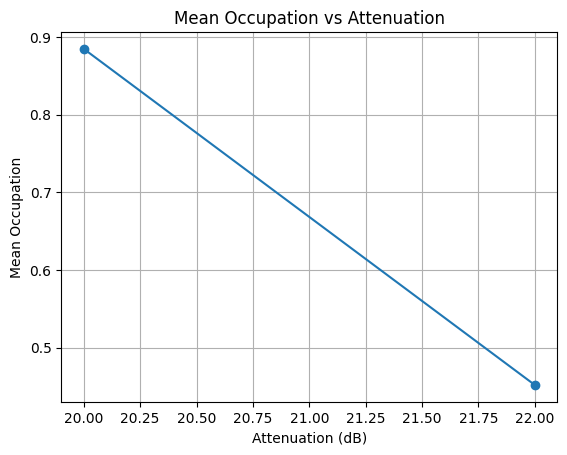

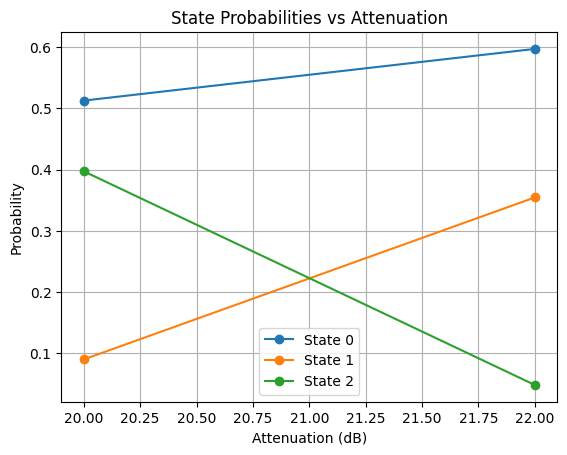

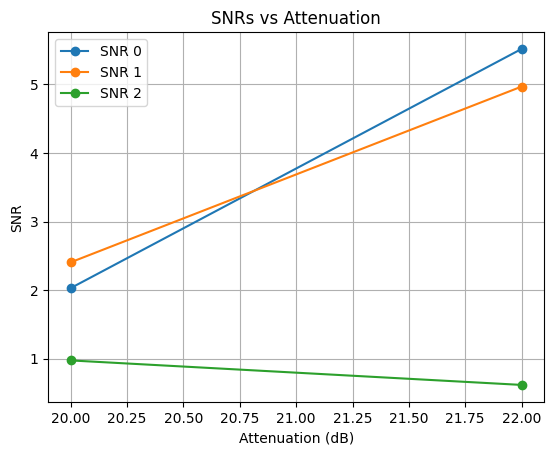

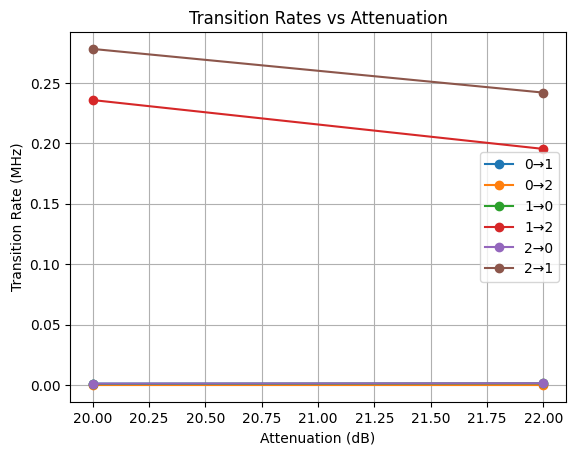

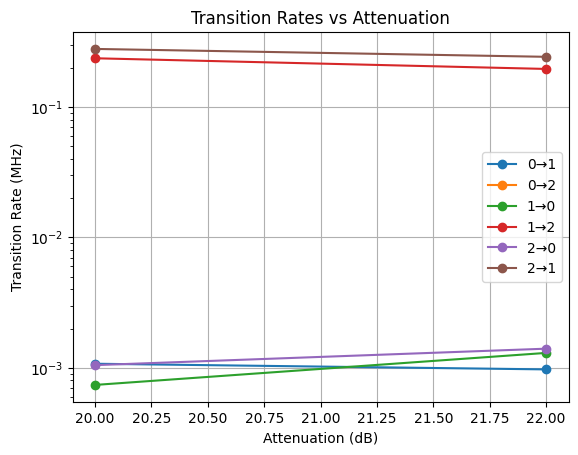


=== Processing attenuation: 18 dB ===


         1    -9931257.7681             +nan
         2    -3192079.9191    +6739177.8490
         3    -3185747.0525       +6332.8665
         4    -3182498.5738       +3248.4788
         5    -3180477.7462       +2020.8276
         6    -3179022.9490       +1454.7972
         7    -3177585.2012       +1437.7478
         8    -3176047.3124       +1537.8888
         9    -3174365.7044       +1681.6080
        10    -3172392.2320       +1973.4724
        11    -3170013.1780       +2379.0540
        12    -3167120.8288       +2892.3492
        13    -3163609.1771       +3511.6517
        14    -3159394.1195       +4215.0575
        15    -3154445.6429       +4948.4766
        16    -3148816.7494       +5628.8935
        17    -3142642.5331       +6174.2163
        18    -3136113.7919       +6528.7412
        19    -3129450.9601       +6662.8318
        20    -3122869.2495       +6581.7106
        21    -3116542.0040       +6327.2455
        22    -3110583.7006       +5958.3033
        23

Mean occupation: 0.8931505402752455
Probabilities: [0.49796961786736277, 0.1109102239900289, 0.39112015814260837]
SNRs: [0.75477739 0.35215585 1.08216154]
Stopping: SNR below threshold (1.5)


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [9]:
analyze_flux_sweep_auto(data_dir, num_modes=3, phi_dirs=phi_dirs, non_linear_attens=non_linear_attens, snr_threshold=1.5, init_param_dir=init_param_dir)